<a href="https://colab.research.google.com/github/SeolYoungKim/Study/blob/main/Predict_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [7]:
cancer = load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [6]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

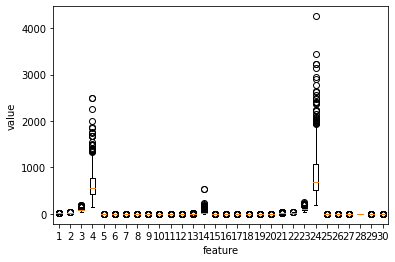

In [10]:
# 30개 특성에 대한 boxplot

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [11]:
cancer.feature_names[[3, 13, 23]]  # 4, 14, 24 번째의 특성 이름 호출

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
np.unique(cancer.target, return_counts=True)  # data의 target에 담겨있는 값들을 리스트로 호출하며, return_counts 파라미터는 각 값이 몇 번씩 나오는지 알려줌.

(array([0, 1]), array([212, 357]))

In [14]:
x = cancer.data
y = cancer.target

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [32]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [33]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [34]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([42, 72]))

In [39]:
one = x.shape[1]
print(one)
print(np.ones(one))
np.ones(30)

30
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
class LogisticNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])  # x의 특성 갯수만큼의 1로 이루어진 array를 생성한다. 즉, 가중치 30개를 전부 1로 초기화.
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a 

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

In [41]:
model = LogisticNeuron()

In [42]:
model.fit(x_train, y_train)

In [45]:
model.predict(x_test)

array([False,  True, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
        True, False,  True, False,  True,  True])

In [46]:
y_test

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [47]:
model.predict(x_test) == y_test

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [48]:
np.mean(model.predict(x_test) == y_test)  
# 테스트 셋의 예측값과 테스트 셋의 y 값이 동일하면 True, 아니면 False. np.mean이 전체 값 중 True의 비율 값 반환. > True가 많을 수록 예측을 잘한거임

0.8245614035087719

In [51]:
np.mean(np.array([True, True, True, False]))  # True의 비율을 반환

0.75

In [58]:
class SingleLayer:
  
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])  # x의 특성 갯수만큼의 1로 이루어진 array를 생성한다. 즉, 가중치 30개를 전부 1로 초기화.
    self.b = 0

    for i in range(epochs):
      loss = 0 
      indexes = np.random.permutation(np.arange(len(x)))

      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad

        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
      
      self.losses.append(loss/len(y))
    print("학습 완료")

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a 

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [ ]:
np.random.permutation(np.arange(len(x))) 

In [ ]:
print(len(x))
np.arange(len(x)) # 0부터 len(x)-1 까지의 값을 1 간격으로 넘파이 어레이에 넣음.
np.arange(3, len(x))  # 3부터 len(x)-1 까지의 값을 1 간격으로 넘파이 어레이에 넣음.
np.arange(3, len(x), 3)  # 3부터 len(x)-1 까지의 값을 3 간격으로 넘파이 어레이에 넣음.

In [59]:
model = SingleLayer()

model.fit(x_train, y_train)

학습 완료


In [60]:
model.score(x_test, y_test)

0.9210526315789473

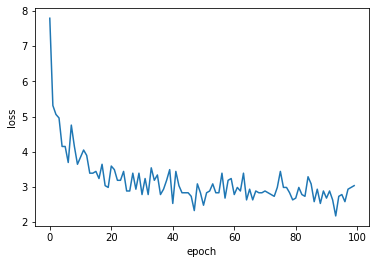

In [62]:
plt.plot(model.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [64]:
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

In [65]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [66]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [67]:
y_test[0:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])